# NYC School classification based on SAT scores

Data downloaded from: https://data.cityofnewyork.us/Education/SAT-Results/f9bf-2cp4

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import classification_report
from sklearn import cross_validation
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.base import TransformerMixin
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, LabelBinarizer

from sklearn.linear_model import LogisticRegression
from sklearn.cluster.hierarchical import AgglomerativeClustering

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks")
sns.set_context("poster")

In [2]:
df = pd.read_csv("data/SAT_Results.csv")

In [14]:
df_filtered = df[(df["Num of SAT Test Takers"] != "s") & (df["SAT Critical Reading Avg. Score"] != "s")\
                 & (df["SAT Math Avg. Score"] != "s") & (df["SAT Writing Avg. Score"] != "s")].copy()

In [69]:
df_filtered[df_filtered.columns[2:]] = df_filtered[df_filtered.columns[2:]].astype(np.float)
df_filtered.to_csv("data/SAT_Results.filtered.txt", sep="\t", index=False)

In [54]:
df_filtered.shape

(421, 6)

In [55]:
df_filtered.head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384


In [56]:
class MultiColumnExtractor(TransformerMixin):
    def __init__(self, colnames):
        print "Initialized extractor for column %s" % colnames
        self.colnames = colnames
    def get_feature_names(self):
        return self.colnames
    def transform(self, X, **transform_params):
        print "Extracting columns [%s]" % (self.colnames,)
        return pd.DataFrame(X[self.colnames])
    def fit(self, X, y=None, **fit_params):
        return self

In [57]:
pipeline = Pipeline([
        ("columns", MultiColumnExtractor(df_filtered.columns[2:])),
        ("features_scaled", StandardScaler())
    ])

Initialized extractor for column Index([u'Num of SAT Test Takers', u'SAT Critical Reading Avg. Score',
       u'SAT Math Avg. Score', u'SAT Writing Avg. Score'],
      dtype='object')


In [65]:
cluster = AgglomerativeClustering(n_clusters=5)

In [66]:
X = pipeline.fit_transform(df_filtered)
print X.shape
cids = cluster.fit_predict(X)

df_pred = pd.concat((df_filtered[df_filtered.columns[:2]], pd.DataFrame(X, columns=df_filtered.columns[2:]), pd.Series(cids, name="ClusterID")), axis=1)
df_pred.head()

Extracting columns [Index([u'Num of SAT Test Takers', u'SAT Critical Reading Avg. Score',
       u'SAT Math Avg. Score', u'SAT Writing Avg. Score'],
      dtype='object')]
(421, 4)


,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,ClusterID
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,-0.523469,-0.808145,-0.145001,-0.529079,2
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,-0.124369,-0.314625,0.149082,-0.477854,2
2,01M450,EAST SIDE COMMUNITY SCHOOL,-0.259548,-0.420380,-0.175957,-0.409555,2
3,01M458,FORSYTH SATELLITE ACADEMY,-0.665086,0.231772,-0.191435,-0.597379,2
4,01M509,MARTA VALLE HIGH SCHOOL,-0.426913,-0.191245,0.303862,-0.170506,2


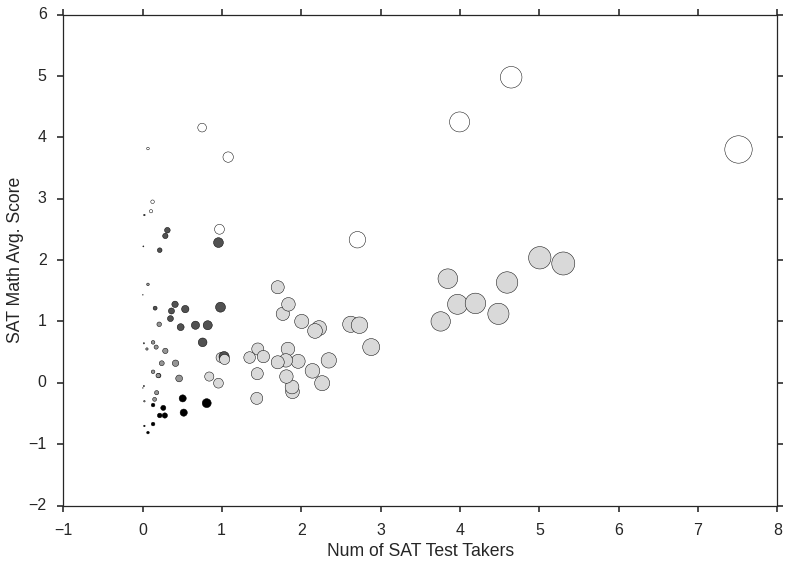

In [68]:
cols = df_pred.columns
xi, yi = cols[2], cols[4]
plt.scatter(df_pred[xi], df_pred[yi], c=df_pred[cols[6]], s=df_pred[cols[2]]*100, cmap="Greys")
plt.xlabel(xi)
plt.ylabel(yi)

In [ ]:
from sklearn.cluster.hierarchical import p